In [1]:
import sys
import os

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

In [2]:
from models import TRAINED_MODELS_ROOT

In [3]:
from os import listdir
from os.path import isfile, join
models = [f for f in listdir(TRAINED_MODELS_ROOT) if isfile(join(TRAINED_MODELS_ROOT, f))]

In [4]:
from src.utils import embeddings

In [5]:
models[0].split("_")[-1][:-4]

'LogisticRegression'

In [6]:
file_path, dim, embedding_type = embeddings.get("_".join(models[0].split("_")[1:-1]))

In [7]:
from src.models import LogisticRegression

In [8]:
lg_model = LogisticRegression(dim, 1)

In [9]:
import torch

lg_model.load_state_dict(torch.load(f"{TRAINED_MODELS_ROOT}/{models[0]}"))
lg_model.eval()

LogisticRegression(
  (linear): Linear(in_features=300, out_features=1, bias=True)
)

In [10]:
weights = list(lg_model.parameters())

In [11]:
type(weights[0][0])

torch.Tensor

In [12]:
named_parameters = list(lg_model.named_parameters())

In [13]:
type(named_parameters[0][1])

torch.nn.parameter.Parameter

In [14]:
import seaborn as sns; sns.set_theme()

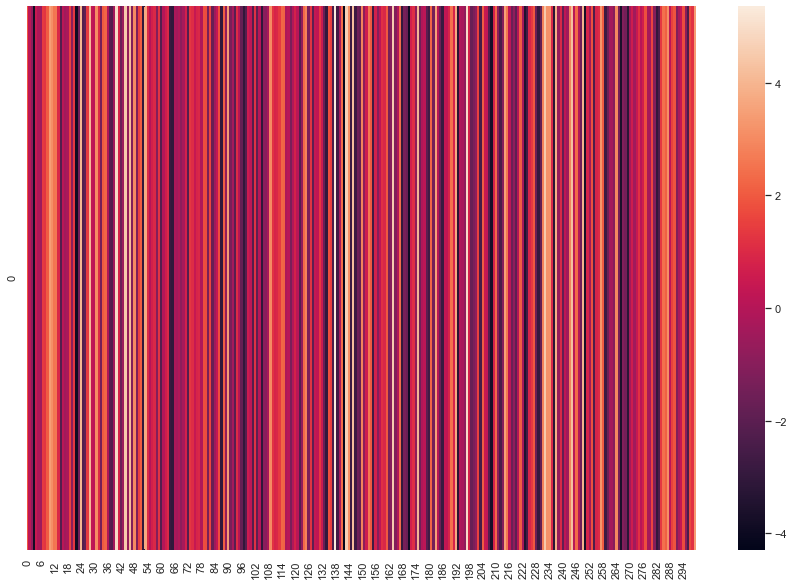

In [15]:
ax = sns.heatmap(named_parameters[0][1].detach().numpy())
# named_parameters[0][1]

In [16]:
print(f"{TRAINED_MODELS_ROOT}/{models[0]}")

C:\Users\acqua\Code\contextual_embeddings\models\trained_models/activity_FASTTEXT_CRAWL_SUB_LogisticRegression.pth
